In [ ]:
import tensorflow.keras
from tensorflow.keras.layers import Conv2D, Input, MaxPool2D, RandomRotation, RandomTranslation, RandomZoom, Dropout, Flatten, Dense
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import plot_model


In [ ]:
# Загружаем данные
(x, y), (xt, yt) = mnist.load_data()
y=y%2
yt=yt%2
y = tensorflow.keras.utils.to_categorical(y, 2)
yt = tensorflow.keras.utils.to_categorical(yt, 2)

In [ ]:
# Основаня модель для классификации цифр
model = tensorflow.keras.Sequential([
    Input(shape=(28, 28, 1)),
                                    #  Эти слои нужны, чтобы разнообразить входные данные. Обычно применяются если датасет маленький или нужно повысить устойчивость модели к шуму
    RandomRotation(0.05),           #  Немного поворачиваем
    RandomTranslation(0.05, 0.05),  #  Немного смещаем
    RandomZoom(-0.01, 0.01),        #  Немного масштабируем


    Flatten(),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')   # <- здесь функция активации softmax, чтобы выходы были как вероятности от 0 до 1
 ])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [ ]:
model.fit(x, y, batch_size=60, epochs=5, validation_split=0.2)

Epoch 1/5
800/800 [==============================] - 17s 20ms/step - loss: 1.6681 - accuracy: 0.8720 - val_loss: 0.8185 - val_accuracy: 0.8994
Epoch 2/5
800/800 [==============================] - 10s 12ms/step - loss: 0.4316 - accuracy: 0.9197 - val_loss: 0.5111 - val_accuracy: 0.9100
Epoch 3/5
800/800 [==============================] - 11s 14ms/step - loss: 0.2313 - accuracy: 0.9379 - val_loss: 0.2007 - val_accuracy: 0.9441
Epoch 4/5
800/800 [==============================] - 11s 14ms/step - loss: 0.1651 - accuracy: 0.9469 - val_loss: 0.1417 - val_accuracy: 0.9557
Epoch 5/5
800/800 [==============================] - 9s 12ms/step - loss: 0.1353 - accuracy: 0.9536 - val_loss: 0.1486 - val_accuracy: 0.9535


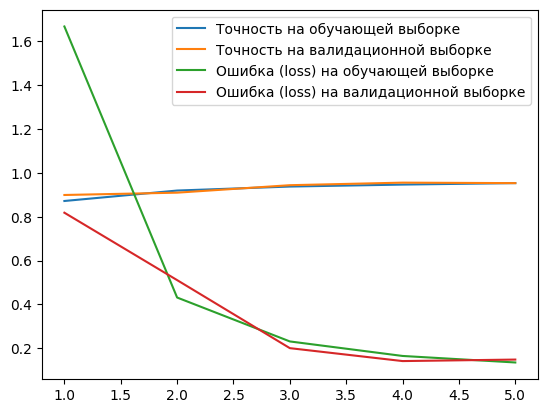

In [ ]:
hist = model.history.history

epoch_ind = range(1, len(hist['accuracy']) + 1)
plt.plot(epoch_ind, hist['accuracy'], label='Точность на обучающей выборке')
plt.plot(epoch_ind, hist['val_accuracy'], label='Точность на валидационной выборке')
plt.legend()
plt.plot(epoch_ind, hist['loss'], label='Ошибка (loss) на обучающей выборке')
plt.plot(epoch_ind, hist['val_loss'], label='Ошибка (loss) на валидационной выборке')
plt.legend()
model.save("neuro2.pd")

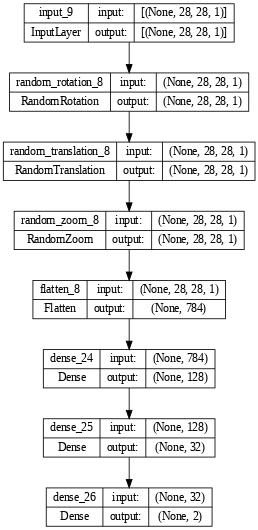

In [ ]:
# Основная модель
plot_model(model, dpi=60, show_shapes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_8 (RandomRo  (None, 28, 28, 1)        0         
 tation)                                                         
                                                                 
 random_translation_8 (Rando  (None, 28, 28, 1)        0         
 mTranslation)                                                   
                                                                 
 random_zoom_8 (RandomZoom)  (None, 28, 28, 1)         0         
                                                                 
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 32)               